# Advanced regression Assignment

## Problem Statement :

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. The company wants to know

* Which variables are significant in predicting the price of a house, and
* How well those variables describe the price of a house.

## Business Goal :

* Build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.
* Build a model which the company can use to predict Sale Price of houses in Australia
* Find out which variables are significant in predicting the price of a house
* How well those variables describe the price of a house
* Determine the optimal value of lambda for ridge and lasso regression.


## Step1: Reading and Understanding the Data 

In [77]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing all required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [3]:
# Reading  dataset
house_price = pd.read_csv("C:\\Advanced_Regression_Assignment\\train.csv", encoding = 'utf-8')
house_price.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
house_price.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
house_price.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
house_price.shape

(1460, 81)

In [7]:
house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [8]:
house_price.head(12).transpose()

,0,1,2,3,4,5,6,7,8,9,10,11
Id,1,2,3,4,5,6,7,8,9,10,11,12
MSSubClass,60,20,60,70,60,50,20,60,50,190,20,60
MSZoning,RL,RL,RL,RL,RL,RL,RL,RL,RM,RL,RL,RL
LotFrontage,65,80,68,60,84,85,75,NaN,51,50,70,85
LotArea,8450,9600,11250,9550,14260,14115,10084,10382,6120,7420,11200,11924
Street,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,Reg,IR1,IR1,IR1,IR1,Reg,IR1,Reg,Reg,Reg,IR1
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub


## step2: Data cleaning

In [9]:
## check for null values in all columns
round(((house_price.isnull().sum())/len(house_price.index))*100,2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
                 ...  
BedroomAbvGr      0.00
KitchenAbvGr      0.00
KitchenQual       0.00
TotRmsAbvGrd      0.00
Functional        0.00
Fireplaces        0.00
FireplaceQu      47.26
GarageType        5.55
GarageYrBlt       5.55
GarageFinish      5.55
GarageCars        0.00
GarageArea        0.00
GarageQual 

In [10]:
#Missing values in most of the columns means facity not available
#some ofthe columns have more than 85% missing values.if we impute them the column will be highly skewed.
#so drop the columns ,more than 85% missing values.
house_price.drop(['MiscFeature','PoolQC','Alley'],1,inplace=True)

In [11]:
#99.5% houses dont have poolarea only few houses have poolarea, and it is not sufficient for prdiction
100*(house_price['PoolArea'].value_counts()/house_price['PoolArea'].count())

0      99.520548
738     0.068493
648     0.068493
576     0.068493
555     0.068493
519     0.068493
512     0.068493
480     0.068493
Name: PoolArea, dtype: float64

In [12]:
#drop poolarea it is not sufficient for the prediction
house_price.drop(['PoolArea'],1,inplace=True)

In [13]:
#MiscVal also not sufficient for prediction
100*(house_price['MiscVal'].value_counts()/house_price['MiscVal'].count())

0        96.438356
400       0.753425
500       0.547945
700       0.342466
450       0.273973
2000      0.273973
600       0.273973
1200      0.136986
480       0.136986
1150      0.068493
800       0.068493
15500     0.068493
620       0.068493
3500      0.068493
560       0.068493
2500      0.068493
1300      0.068493
1400      0.068493
350       0.068493
8300      0.068493
54        0.068493
Name: MiscVal, dtype: float64

In [14]:
#drop poolarea it is not sufficient for the prediction
house_price.drop(['MiscVal'],1,inplace=True)

**check  null values in all categorical columns**

In [15]:
# check for null values in all categorical columns
house_price.select_dtypes(include='object').isnull().sum()[house_price.select_dtypes(include='object').isnull().sum()>0]

MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
Fence           1179
dtype: int64

In [16]:
#Cleaning up variable BsmtQual (Replacing NA => No Basement) to reduce the features
house_price['BsmtQual'].replace({np.nan:'No Basement'},inplace=True)
print(100*(house_price['BsmtQual'].value_counts()/house_price['BsmtQual'].count()))

TA             44.452055
Gd             42.328767
Ex              8.287671
No Basement     2.534247
Fa              2.397260
Name: BsmtQual, dtype: float64


In [17]:
#Cleaning up variable BsmtCond (Replacing NA => No Basement)
house_price['BsmtCond'].replace({np.nan:'No Basement'},inplace=True)
100*(house_price['BsmtCond'].value_counts()/house_price['BsmtCond'].count())

TA             89.794521
Gd              4.452055
Fa              3.082192
No Basement     2.534247
Po              0.136986
Name: BsmtCond, dtype: float64

In [18]:
#Cleaning up variable BsmtExposure (Replacing NA => No Basement)
house_price['BsmtExposure'].replace({np.nan:'No Basement'},inplace=True)
100*(house_price['BsmtExposure'].value_counts()/house_price['BsmtExposure'].count())

No             65.273973
Av             15.136986
Gd              9.178082
Mn              7.808219
No Basement     2.602740
Name: BsmtExposure, dtype: float64

In [19]:
#Cleaning up variable BsmtFinType1 (Replacing NA => No Basement)
house_price['BsmtFinType1'].replace({np.nan:'No Basement'},inplace=True)
100*(house_price['BsmtFinType1'].value_counts()/house_price['BsmtFinType1'].count())

Unf            29.452055
GLQ            28.630137
ALQ            15.068493
BLQ            10.136986
Rec             9.109589
LwQ             5.068493
No Basement     2.534247
Name: BsmtFinType1, dtype: float64

In [20]:
#Cleaning up variable BsmtFinType2 (Replacing NA => No Basement)
house_price['BsmtFinType2'].replace({np.nan:'No Basement'},inplace=True)
100*(house_price['BsmtFinType2'].value_counts()/house_price['BsmtFinType2'].count())

Unf            86.027397
Rec             3.698630
LwQ             3.150685
No Basement     2.602740
BLQ             2.260274
ALQ             1.301370
GLQ             0.958904
Name: BsmtFinType2, dtype: float64

In [21]:
#Cleaning up variable FireplaceQu (Replacing NA => No Fireplace)
house_price['FireplaceQu'].replace({np.nan:'No Fireplace'},inplace=True)
print(100*(house_price['FireplaceQu'].value_counts()/house_price['FireplaceQu'].count()))

No Fireplace    47.260274
Gd              26.027397
TA              21.438356
Fa               2.260274
Ex               1.643836
Po               1.369863
Name: FireplaceQu, dtype: float64


In [22]:
#Cleaning up variable GarageType (Replacing NA => No Garage)
house_price['GarageType'].replace({np.nan:'No Garage'},inplace=True)
100*(house_price['GarageType'].value_counts()/house_price['GarageType'].count())

Attchd       59.589041
Detchd       26.506849
BuiltIn       6.027397
No Garage     5.547945
Basment       1.301370
CarPort       0.616438
2Types        0.410959
Name: GarageType, dtype: float64

In [23]:
#Cleaning up variable GarageFinish (Replacing NA => No Garage)
house_price['GarageFinish'].replace({np.nan:'No Garage'},inplace=True)
100*(house_price['GarageFinish'].value_counts()/house_price['GarageFinish'].count())

Unf          41.438356
RFn          28.904110
Fin          24.109589
No Garage     5.547945
Name: GarageFinish, dtype: float64

In [24]:
#Cleaning up variable GarageQual (Replacing NA => No Garage)
house_price['GarageQual'].replace({np.nan:'No Garage'},inplace=True)
print(100*(house_price['GarageQual'].value_counts()/house_price['GarageQual'].count()))

TA           89.794521
No Garage     5.547945
Fa            3.287671
Gd            0.958904
Ex            0.205479
Po            0.205479
Name: GarageQual, dtype: float64


In [25]:
#Cleaning up variable GarageCond (Replacing NA => No Garage)
house_price['GarageCond'].replace({np.nan:'No Garage'},inplace=True)
print(100*(house_price['GarageCond'].value_counts()/house_price['GarageCond'].count()))

TA           90.821918
No Garage     5.547945
Fa            2.397260
Gd            0.616438
Po            0.479452
Ex            0.136986
Name: GarageCond, dtype: float64


In [26]:
#Cleaning up variable Fence (Replacing NA => No Fence)
house_price['Fence'].replace({np.nan:'No Fence'},inplace=True)
print(100*(house_price['Fence'].value_counts()/house_price['Fence'].count()))

No Fence    80.753425
MnPrv       10.753425
GdPrv        4.041096
GdWo         3.698630
MnWw         0.753425
Name: Fence, dtype: float64


In [27]:
## Replace NA with None in the following columns below 
house_price['MasVnrType']=house_price['MasVnrType'].fillna('None')
house_price['Electrical']=house_price['Electrical'].fillna('None')

In [28]:
# check if any  null values in all categorical columns
house_price.select_dtypes(include='object').isnull().sum()[house_price.select_dtypes(include='object').isnull().sum()>0]

Series([], dtype: int64)

No null values in the categorical variables

In [29]:
house_price.shape

(1460, 76)

In [30]:
#Remove categorical attributes that have more than 85% data associated to one value. 
#We will remove any column that has one value repeating 1241 times (1241/1460)*100 = 85%) as this column would be skewed
#to one value
# Drop the following columns that have more than 85% values associated to a specific value

# Method to get the column names that have count of one value more than 85%

def getHighCategoricalValueCounts():
    column = []
    categorical_columns = house_price.select_dtypes(include=['object'])
    for col in (categorical_columns):
        if(house_price[col].value_counts().max() >= 1241):
            column.append(col)
    return column

columnsToBeRemoved = getHighCategoricalValueCounts()

# Remove the columns with skewed data

house_price.drop(columnsToBeRemoved, axis = 1, inplace = True)

house_price.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MoSold,YrSold,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,61,0,0,0,No Fence,2,2008,Normal,208500
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,298,0,0,0,0,No Fence,5,2007,Normal,181500
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,42,0,0,0,No Fence,9,2008,Normal,223500
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,0,35,272,0,0,No Fence,2,2006,Abnorml,140000
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,192,84,0,0,0,No Fence,12,2008,Normal,250000


In [31]:
# check the null values in the numerical data
100*(house_price.select_dtypes(include=['int64','float']).isnull().sum()/len(house_price.index))[100*(house_price.select_dtypes(include=['int64','float']).isnull().sum()/len(house_price.index))>0]

LotFrontage    17.739726
MasVnrArea      0.547945
GarageYrBlt     5.547945
dtype: float64

In [32]:
# Impute the null values with mean values for LotFrontage and MasVnrArea columns

house_price['LotFrontage'] = house_price['LotFrontage'].replace(np.nan, house_price['LotFrontage'].mean())
house_price['MasVnrArea'] = house_price['MasVnrArea'].replace(np.nan, house_price['MasVnrArea'].mean())

In [33]:
# Setting the null values with 0 for GarageYrBlt
house_price['GarageYrBlt']=house_price['GarageYrBlt'].fillna(0)
house_price['GarageYrBlt'] = house_price['GarageYrBlt'].astype(int)

In [34]:
# check the null values in the numerical data
house_price.select_dtypes(include=['int64','float']).isnull().sum()[house_price.select_dtypes(include=['int64','float']).isnull()
                                                                  .sum()>0]

Series([], dtype: int64)

No null values in the numerical variables

In [35]:
#Remove numerical attributes that have more than 85% data associated to one value.
#We will remove any column that has one value repeating 1241 times (1241/1460)*100 = 85%) as this column would be skewed
#to one value
# Drop the following columns that have more than 85% values associated to a specific value
# We will also drop MoSold as we will not be using that for further analysis

def getHighNumericalValueCounts():
    column = []
    numerical_columns = house_price.select_dtypes(include=['int64', 'float'])
    for col in (numerical_columns):
        if(house_price[col].value_counts().max() >= 1241):
            column.append(col)
    return column

columnsToBeRemoved = getHighNumericalValueCounts()
house_price.drop(columnsToBeRemoved, axis = 1, inplace = True)

house_price.drop(['MoSold'], axis = 1, inplace = True)

house_price.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Fence,YrSold,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,2003,RFn,2,548,0,61,No Fence,2008,Normal,208500
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,1976,RFn,2,460,298,0,No Fence,2007,Normal,181500
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,2001,RFn,2,608,0,42,No Fence,2008,Normal,223500
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,1998,Unf,3,642,0,35,No Fence,2006,Abnorml,140000
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,2000,RFn,3,836,192,84,No Fence,2008,Normal,250000


In [36]:
#id column will not be used inprediction , we can drop
house_price.drop(['Id'],1,inplace=True)

In [37]:
#there is no null values in the dataset
house_price.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
LotShape         0
LotConfig        0
Neighborhood     0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
Foundation       0
BsmtQual         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtUnfSF        0
TotalBsmtSF      0
HeatingQC        0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
BsmtFullBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
Fence            0
YrSold           0
SaleCondition    0
SalePrice        0
dtype: int64

In [38]:
#creating columns 'house_age' and 'remodelage'
house_price['House_age']=house_price['YrSold']-house_price['YearBuilt']
house_price['Remodel_Age']= house_price['YrSold']-house_price['YearRemodAdd']
house_price[['YearBuilt','YrSold','House_age','YearRemodAdd','Remodel_Age']].head()

,YearBuilt,YrSold,House_age,YearRemodAdd,Remodel_Age
0,2003,2008,5,2003,5
1,1976,2007,31,1976,31
2,2001,2008,7,2002,6
3,1915,2006,91,1970,36
4,2000,2008,8,2000,8


In [39]:
# Create a new column which would indicate if the Garage is old or new.
# Garage Yr Built less than 2000 will be considered as old (0) else new(1). 
# For GarageYrBuilt , where we have imputed the value as 0 will also be treated as old.

def getGarageConstructionPeriod(row):
    if row == 0:
        return 0
    elif row >= 1900 and row < 2000:        
        return 0
    else:   
        return 1
    
house_price['OldOrNewGarage'] = house_price['GarageYrBlt'].apply(getGarageConstructionPeriod)
house_price.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,...,GarageArea,WoodDeckSF,OpenPorchSF,Fence,YrSold,SaleCondition,SalePrice,House_age,Remodel_Age,OldOrNewGarage
0,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,...,548,0,61,No Fence,2008,Normal,208500,5,5,1
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,...,460,298,0,No Fence,2007,Normal,181500,31,31,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,...,608,0,42,No Fence,2008,Normal,223500,7,6,1
3,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,...,642,0,35,No Fence,2006,Abnorml,140000,91,36,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,...,836,192,84,No Fence,2008,Normal,250000,8,8,1


In [40]:
# Since we have created new features from YearBuilt, YearRemodAdd, YrSold and GarageYrBlt, we can drop these columns
house_price.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt'], axis = 1, inplace = True)

In [41]:
#imputing GarageYrBlt_Old with -1 as these house donot have garage
house_price.OldOrNewGarage.fillna(-1,inplace=True)

In [42]:
# Check if there are any duplicate values in the dataset
house_price[house_price.duplicated(keep=False)]

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Fence,SaleCondition,SalePrice,House_age,Remodel_Age,OldOrNewGarage


In [43]:
house_price[list(house_price.dtypes[house_price.dtypes!='object'].index)].describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,House_age,Remodel_Age,OldOrNewGarage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,103.685262,443.639726,567.240411,1057.429452,1162.626712,...,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,180921.195890,36.547945,22.950000,0.275342
std,42.300571,22.024023,9981.264932,1.382997,1.112799,180.569112,456.098091,441.866955,438.705324,386.587738,...,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,79442.502883,30.250152,20.640653,0.446840
min,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,334.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,0.000000,-1.000000,0.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,223.000000,795.750000,882.000000,...,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,129975.000000,8.000000,4.000000,0.000000
50%,50.000000,70.049958,9478.500000,6.000000,5.000000,0.000000,383.500000,477.500000,991.500000,1087.000000,...,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,163000.000000,35.000000,14.000000,0.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,808.000000,1298.250000,1391.250000,...,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,214000.000000,54.000000,41.000000,1.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,1600.000000,5644.000000,2336.000000,6110.000000,4692.000000,...,14.000000,3.000000,4.000000,1418.000000,857.000000,547.000000,755000.000000,136.000000,60.000000,1.000000


**Outlier Treatment**

In [44]:
# Checking outliers at 25%,50%,75%,90%,95% and above
house_price.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,House_age,Remodel_Age,OldOrNewGarage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,103.685262,443.639726,567.240411,1057.429452,1162.626712,...,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,180921.195890,36.547945,22.950000,0.275342
std,42.300571,22.024023,9981.264932,1.382997,1.112799,180.569112,456.098091,441.866955,438.705324,386.587738,...,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,79442.502883,30.250152,20.640653,0.446840
min,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,334.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,0.000000,-1.000000,0.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,223.000000,795.750000,882.000000,...,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,129975.000000,8.000000,4.000000,0.000000
50%,50.000000,70.049958,9478.500000,6.000000,5.000000,0.000000,383.500000,477.500000,991.500000,1087.000000,...,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,163000.000000,35.000000,14.000000,0.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,808.000000,1298.250000,1391.250000,...,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,214000.000000,54.000000,41.000000,1.000000
90%,120.000000,92.000000,14381.700000,8.000000,7.000000,335.000000,1065.500000,1232.000000,1602.200000,1680.000000,...,9.000000,1.000000,3.000000,757.100000,262.000000,130.000000,278000.000000,84.000000,56.000000,1.000000
95%,160.000000,104.000000,17401.150000,8.000000,8.000000,456.000000,1274.000000,1468.000000,1753.000000,1831.250000,...,10.000000,2.000000,3.000000,850.100000,335.000000,175.050000,326100.000000,91.000000,58.000000,1.000000
99%,190.000000,137.410000,37567.640000,10.000000,9.000000,791.280000,1572.410000,1797.050000,2155.050000,2219.460000,...,11.000000,2.000000,3.000000,1002.790000,505.460000,285.820000,442567.010000,110.410000,60.000000,1.000000


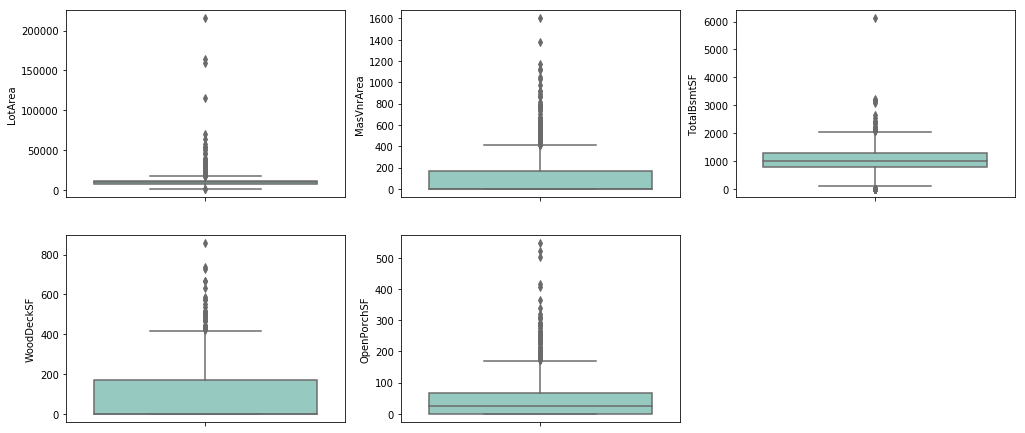

In [45]:
# Check the outliers in all the numeric columns

plt.figure(figsize=(17, 20))
plt.subplot(5,3,1)
sns.boxplot(y = 'LotArea', palette='Set3', data = house_price)
plt.subplot(5,3,2)
sns.boxplot(y = 'MasVnrArea', palette='Set3', data = house_price)
plt.subplot(5,3,3)
sns.boxplot(y = 'TotalBsmtSF', palette='Set3', data = house_price)
plt.subplot(5,3,4)
sns.boxplot(y = 'WoodDeckSF', palette='Set3', data = house_price)
plt.subplot(5,3,5)
sns.boxplot(y = 'OpenPorchSF', palette='Set3', data = house_price)
plt.show()

In [46]:
# handling Outliers

# for hadling the outliers where i am taking the lower and upper quantile as 0.25 & 0.99 respectively

nn_quartile_LotArea = house_price['LotArea'].quantile(0.99)
house_price = house_price[house_price["LotArea"] < nn_quartile_LotArea]

# Removing values beyond 98% for MasVnrArea

nn_quartile_MasVnrArea = house_price['MasVnrArea'].quantile(0.99)
house_price = house_price[house_price["MasVnrArea"] < nn_quartile_MasVnrArea]

# Removing values beyond 99% for TotalBsmtSF

nn_quartile_TotalBsmtSF = house_price['TotalBsmtSF'].quantile(0.99)
house_price = house_price[house_price["TotalBsmtSF"] < nn_quartile_TotalBsmtSF]

# Removing values beyond 99% for WoodDeckSF

nn_quartile_WoodDeckSF = house_price['WoodDeckSF'].quantile(0.99)
house_price = house_price[house_price["WoodDeckSF"] < nn_quartile_WoodDeckSF]

# Removing values beyond 99% for OpenPorchSF

nn_quartile_OpenPorchSF = house_price['OpenPorchSF'].quantile(0.99)
house_price = house_price[house_price["OpenPorchSF"] < nn_quartile_OpenPorchSF]

## step 3: Exploratory Data Analysis

Lets check for the mean, standard deviation for Sales price

In [48]:
house_price['SalePrice'].describe()

count      1386.000000
mean     175168.726551
std       69754.123667
min       35311.000000
25%      129000.000000
50%      160000.000000
75%      206975.000000
max      582933.000000
Name: SalePrice, dtype: float64

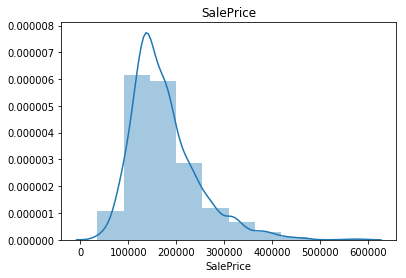

In [49]:
#check the distribution of our target variable
plt.title('SalePrice')
sns.distplot(house_price['SalePrice'], bins=10)
plt.show()

Sales price is right skewed. So, we perform log transformation so that the skewness is nearly zero.

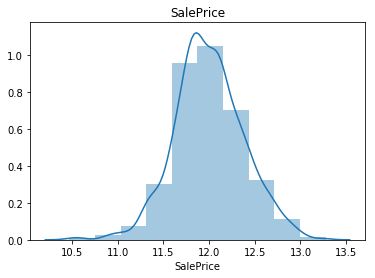

In [50]:
# Visualise the target variable -> SalePrice after transforming the sales price
#now the target variable is normally distributed.

house_price['SalePrice'] = np.log1p(house_price['SalePrice'])

plt.title('SalePrice')
sns.distplot(house_price['SalePrice'], bins=10)
plt.show()

The target value seems to be normalized with some noise.

In [51]:
house_price['SalePrice'].describe()

count    1386.000000
mean       12.001342
std         0.379259
min        10.471978
25%        11.767575
50%        11.982935
75%        12.240358
max        13.275829
Name: SalePrice, dtype: float64

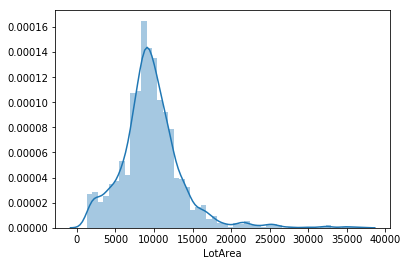

In [52]:
# Predictor variable: LotArea --> Lot size in square feet
sns.distplot(house_price['LotArea'])
plt.show()
#Normally distributed --- LotArea

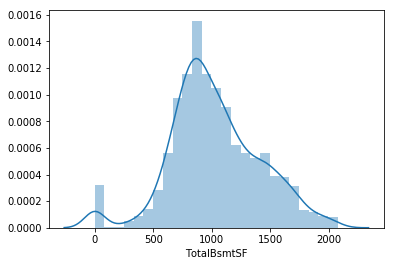

In [53]:
# Predictor variable: TotalBsmtSF ---> Total square feet of basement area
sns.distplot(house_price['TotalBsmtSF'])
plt.show()

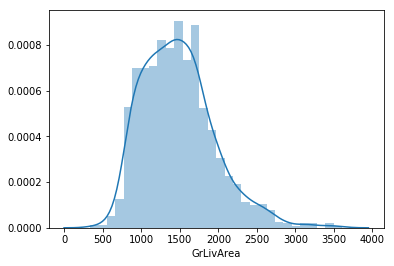

In [54]:
# Predictor variable: GrLivArea--> Above grade (ground) living area square feet
sns.distplot(house_price['GrLivArea'])
plt.show()
#Normally distributed but slightly bimodal

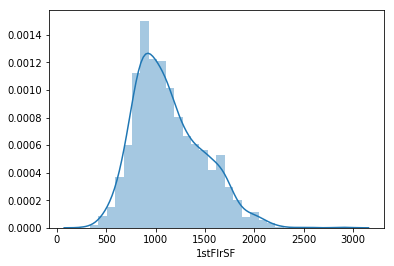

In [55]:
# Predictor variable: 1stFlrSF: First Floor square feet
sns.distplot(house_price['1stFlrSF'])
plt.show()
#Normally distributed with bimodaldistribution

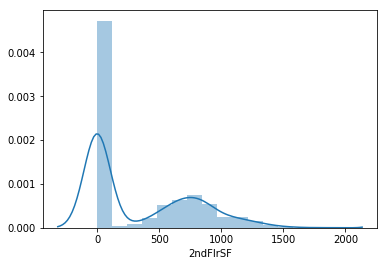

In [56]:
# Predictor variable: 2ndFlrSF: Second floor square feet
sns.distplot(house_price['2ndFlrSF'])
plt.show()
#Normally distributed 

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 720x360 with 0 Axes>

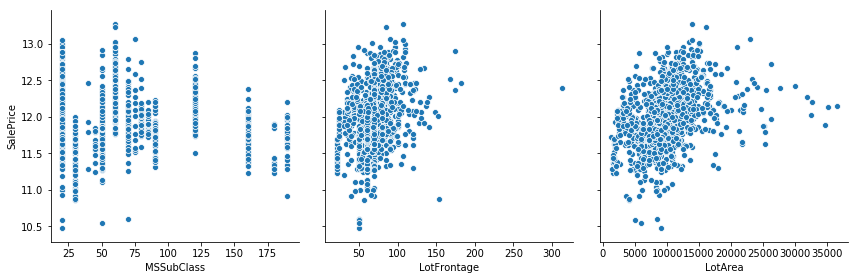

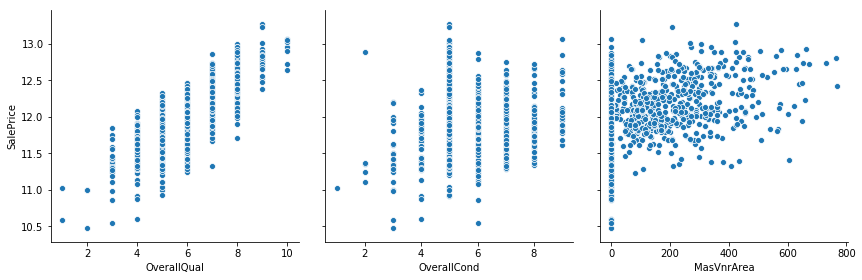

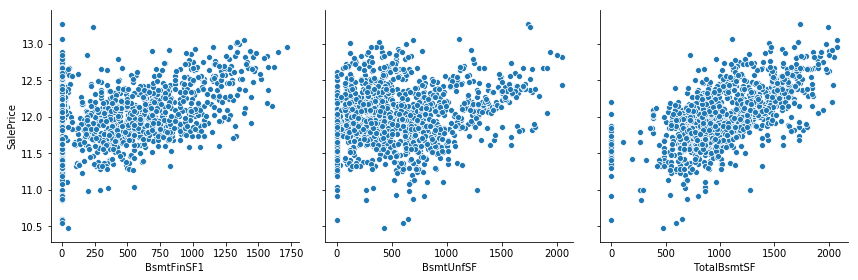

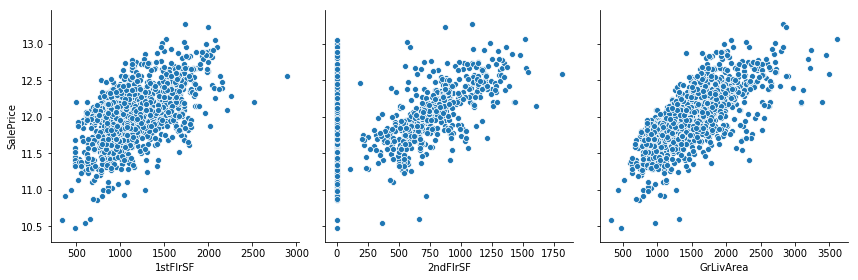

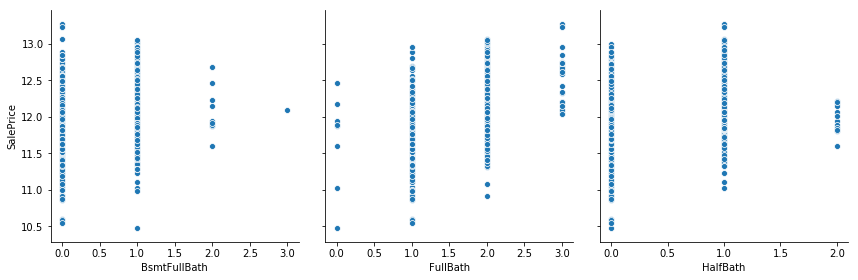

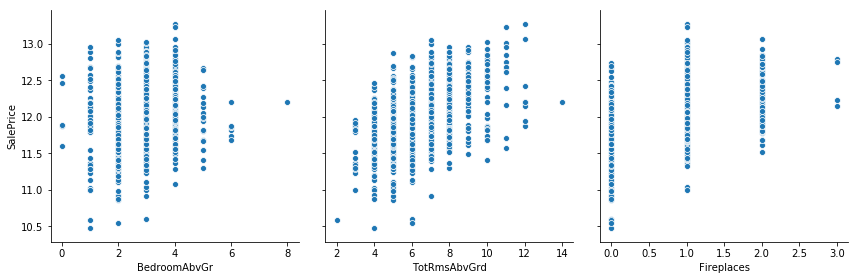

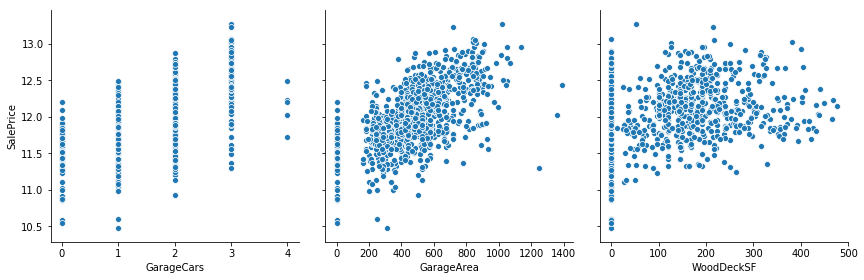

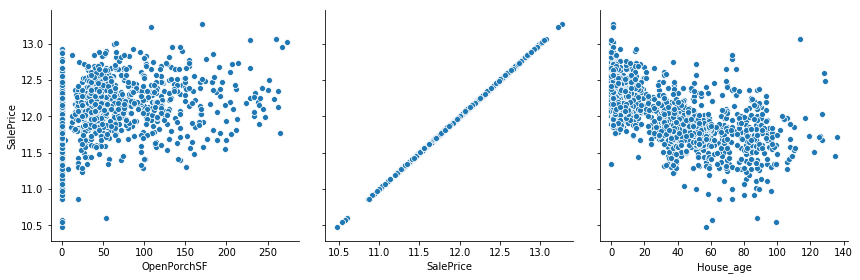

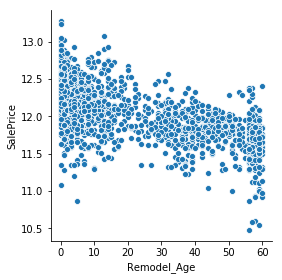

In [57]:
# Check the numerical values using pairplots

plt.figure(figsize=(10,5))
sns.pairplot(house_price, x_vars=['MSSubClass','LotFrontage','LotArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house_price, x_vars=['OverallQual', 'OverallCond','MasVnrArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house_price, x_vars=['BsmtFinSF1', 'BsmtUnfSF','TotalBsmtSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house_price, x_vars=['1stFlrSF','2ndFlrSF', 'GrLivArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house_price, x_vars=['BsmtFullBath','FullBath', 'HalfBath'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house_price, x_vars=['BedroomAbvGr','TotRmsAbvGrd', 'Fireplaces'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house_price, x_vars=['GarageCars','GarageArea', 'WoodDeckSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house_price, x_vars=['OpenPorchSF','SalePrice','House_age'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house_price, x_vars=['Remodel_Age'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
plt.show

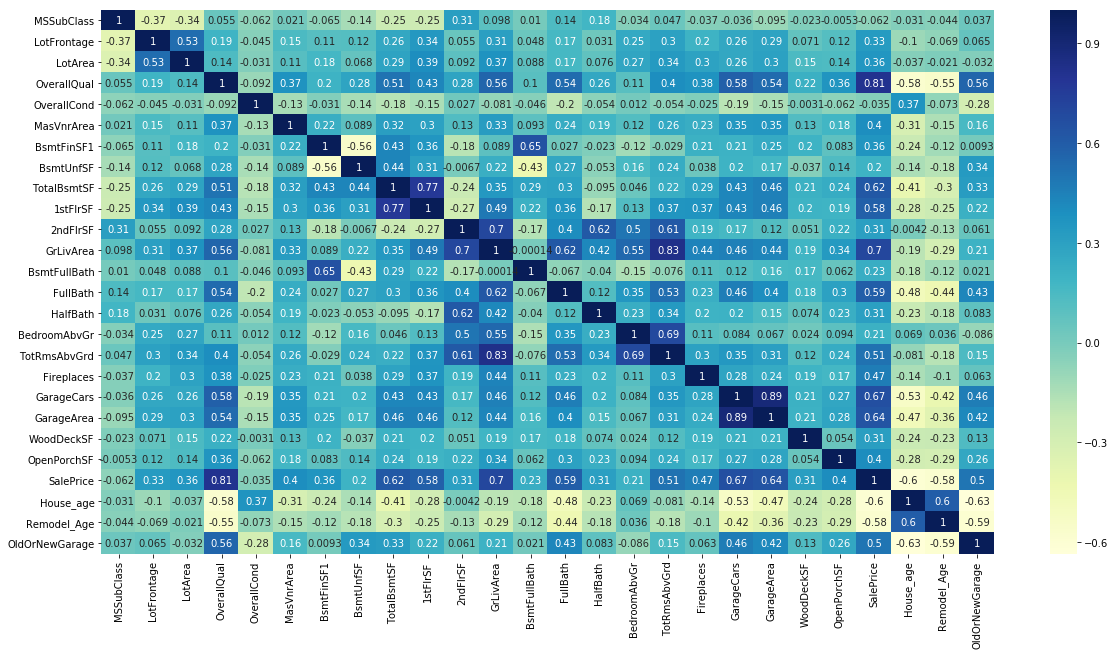

In [58]:
# Check the correlation of numerical columns
plt.figure(figsize=(20,10))
sns.heatmap(house_price[list(house_price.dtypes[house_price.dtypes!='object'].index)].corr(),annot=True,cmap="YlGnBu")
plt.show()

**Removing following columns which shows high correlation**

- TotRmsAbvGrd and GrLivArea show 83%
- Garage Area and Garage Cars show 89%

Hence dropping TotRmsAbvGrd and  Garage Area

In [60]:
# Removing the highly correlated variables
house_price.drop(['TotRmsAbvGrd', 'GarageArea'], axis = 1, inplace = True)

In [61]:
house_price.shape

(1386, 46)

## Step 4: Data Preparation

- Converting categorical data into numercal data 
- Creating Dummies

**Lets check for the below columns here we can clearly see that these are having some kind of order and hence we can say these are ordinal in nature**

In [63]:
# Since the values of the following fields are ordered list, we shall assign values to them in sequence

# For values which can be ordered, we have given an ordered sequence value
# For values which cannot be ordered, we have categorised them into 0 and 1

house_price['d_LotShape'] = house_price['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})
house_price['d_ExterQual'] = house_price['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })
house_price['d_BsmtQual'] = house_price['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'No Basement': 0})
house_price['d_BsmtExposure'] = house_price['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'No Basement': 0})
house_price['d_BsmtFinType1'] = house_price['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 
                                                                 'No Basement': 0})
house_price['d_HeatingQC'] = house_price['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
house_price['d_KitchenQual'] = house_price['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
house_price['d_FireplaceQu'] = house_price['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'No Fireplace': 0})
house_price['d_GarageFinish'] = house_price['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'No Garage': 0 })
house_price['d_BldgType'] = house_price['BldgType'].map({'Twnhs': 5, 'TwnhsE': 4, 'Duplex': 3, '2fmCon': 2, '1Fam': 1, 
                                                                 'None': 0 })
house_price['d_HouseStyle'] = house_price['HouseStyle'].map({'SLvl': 8, 'SFoyer': 7, '2.5Fin': 6, '2.5Unf': 5, '2Story': 4, 
                                                                 '1.5Fin': 3, '1.5Unf': 2, '1Story': 1, 'None': 0 })
house_price['d_Fence'] = house_price['Fence'].map({'GdPrv': 4, 'GdWo': 3, 'MnPrv': 2, 'MnWw': 1, 'No Fence': 0 })
house_price['d_LotConfig'] = house_price['LotConfig'].map({'Inside': 5, 'Corner': 4, 'CulDSac': 3, 'FR2': 2, 'FR3': 1, 
                                                           'None': 0  })
house_price['d_MasVnrType'] = house_price['MasVnrType'].map({'BrkCmn': 1, 'BrkFace': 1, 'CBlock': 1, 'Stone': 1, 'None': 0 })
house_price['d_SaleCondition'] = house_price['SaleCondition'].map({'Normal': 1, 'Partial': 1, 'Abnorml': 0, 'Family': 0, 
                                                                   'Alloca': 0, 'AdjLand': 0, 'None': 0})
house_price.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,...,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish,d_BldgType,d_HouseStyle,d_Fence,d_LotConfig,d_MasVnrType,d_SaleCondition
0,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,...,5,4,0,2,1,4,0,5,1,1
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,...,5,3,3,2,1,1,0,2,0,1
2,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,...,5,4,3,2,1,4,0,5,1,1
3,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,...,4,4,4,1,1,4,0,4,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,...,5,4,3,2,1,4,0,2,1,1


In [64]:
# drop the old columns from which the new columns were derived
# We can also drop the id column as it will not be used any more

house_price = house_price.drop(['LotShape', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 
                                'KitchenQual', 'FireplaceQu', 'GarageFinish', 'BldgType', 'HouseStyle', 'Fence', 
                                'LotConfig', 'MasVnrType', 'SaleCondition'], axis=1)

house_price.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,...,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish,d_BldgType,d_HouseStyle,d_Fence,d_LotConfig,d_MasVnrType,d_SaleCondition
0,60,RL,65.0,8450,CollgCr,7,5,Gable,VinylSd,VinylSd,...,5,4,0,2,1,4,0,5,1,1
1,20,RL,80.0,9600,Veenker,6,8,Gable,MetalSd,MetalSd,...,5,3,3,2,1,1,0,2,0,1
2,60,RL,68.0,11250,CollgCr,7,5,Gable,VinylSd,VinylSd,...,5,4,3,2,1,4,0,5,1,1
3,70,RL,60.0,9550,Crawfor,7,5,Gable,Wd Sdng,Wd Shng,...,4,4,4,1,1,4,0,4,0,0
4,60,RL,84.0,14260,NoRidge,8,5,Gable,VinylSd,VinylSd,...,5,4,3,2,1,4,0,2,1,1


In [65]:
house_price.select_dtypes(include='object').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1386 entries, 0 to 1458
Data columns (total 7 columns):
MSZoning        1386 non-null object
Neighborhood    1386 non-null object
RoofStyle       1386 non-null object
Exterior1st     1386 non-null object
Exterior2nd     1386 non-null object
Foundation      1386 non-null object
GarageType      1386 non-null object
dtypes: object(7)
memory usage: 86.6+ KB


In [66]:
house_price[['d_LotShape' ,'d_ExterQual','d_BsmtQual','d_BsmtExposure','d_BsmtFinType1','d_HeatingQC','d_KitchenQual','d_FireplaceQu',
            'd_GarageFinish','d_BldgType','d_HouseStyle','d_Fence','d_LotConfig','d_MasVnrType','d_SaleCondition']].head()

,d_LotShape,d_ExterQual,d_BsmtQual,d_BsmtExposure,d_BsmtFinType1,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish,d_BldgType,d_HouseStyle,d_Fence,d_LotConfig,d_MasVnrType,d_SaleCondition
0,3,4,4,1,6,5,4,0,2,1,4,0,5,1,1
1,3,3,4,4,5,5,3,3,2,1,1,0,2,0,1
2,2,4,4,2,6,5,4,3,2,1,4,0,5,1,1
3,2,3,3,1,5,4,4,4,1,1,4,0,4,0,0
4,2,4,4,3,6,5,4,3,2,1,4,0,2,1,1


In [67]:
# For the following columns create dummies

# Creating dummies for MSZoning
d_MSZoning = pd.get_dummies(house_price['MSZoning'], prefix='MSZoning', drop_first = True)
house_price = pd.concat([house_price, d_MSZoning], axis = 1)

# Creating dummies for Neighborhood
d_Neighborhood = pd.get_dummies(house_price['Neighborhood'], prefix='Neighborhood', drop_first = True)
house_price = pd.concat([house_price, d_Neighborhood], axis = 1)

# Creating dummies for RoofStyle
d_RoofStyle = pd.get_dummies(house_price['RoofStyle'], prefix='RoofStyle', drop_first = True)
house_price = pd.concat([house_price, d_RoofStyle], axis = 1)

# Creating dummies for Exterior1st
d_Exterior1st = pd.get_dummies(house_price['Exterior1st'], prefix='Exterior1st', drop_first = True)
house_price = pd.concat([house_price, d_Exterior1st], axis = 1)

# Creating dummies for Exterior2nd
d_Exterior2nd = pd.get_dummies(house_price['Exterior2nd'], prefix='Exterior2nd', drop_first = True)
house_price = pd.concat([house_price, d_Exterior2nd], axis = 1)

# Creating dummies for Foundation
d_Foundation = pd.get_dummies(house_price['Foundation'], prefix='Foundation', drop_first = True)
house_price = pd.concat([house_price, d_Foundation], axis = 1)

# Creating dummies for GarageType
d_GarageType = pd.get_dummies(house_price['GarageType'], prefix='GarageType', drop_first = True)
house_price = pd.concat([house_price, d_GarageType], axis = 1)

house_price.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage
0,60,RL,65.0,8450,CollgCr,7,5,Gable,VinylSd,VinylSd,...,1,0,0,0,1,0,0,0,0,0
1,20,RL,80.0,9600,Veenker,6,8,Gable,MetalSd,MetalSd,...,0,0,0,0,1,0,0,0,0,0
2,60,RL,68.0,11250,CollgCr,7,5,Gable,VinylSd,VinylSd,...,1,0,0,0,1,0,0,0,0,0
3,70,RL,60.0,9550,Crawfor,7,5,Gable,Wd Sdng,Wd Shng,...,0,0,0,0,0,0,0,0,1,0
4,60,RL,84.0,14260,NoRidge,8,5,Gable,VinylSd,VinylSd,...,1,0,0,0,1,0,0,0,0,0


In [68]:
# drop the below columns as we now have new columns derived from these columns

house_price = house_price.drop(['MSZoning', 'Neighborhood', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'Foundation', 
                                'GarageType'], axis=1)
house_price.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage
0,60,65.0,8450,7,5,196.0,706,150,856,856,...,1,0,0,0,1,0,0,0,0,0
1,20,80.0,9600,6,8,0.0,978,284,1262,1262,...,0,0,0,0,1,0,0,0,0,0
2,60,68.0,11250,7,5,162.0,486,434,920,920,...,1,0,0,0,1,0,0,0,0,0
3,70,60.0,9550,7,5,0.0,216,540,756,961,...,0,0,0,0,0,0,0,0,1,0
4,60,84.0,14260,8,5,350.0,655,490,1145,1145,...,1,0,0,0,1,0,0,0,0,0


In [70]:
house_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1386 entries, 0 to 1458
Columns: 112 entries, MSSubClass to GarageType_No Garage
dtypes: float64(3), int64(36), uint8(73)
memory usage: 531.9 KB


Now all colums in data set are numeric

## Step 5: Train Test Split

In [71]:
X = house_price.drop(['SalePrice'], axis=1)
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage
0,60,65.0,8450,7,5,196.0,706,150,856,856,...,1,0,0,0,1,0,0,0,0,0
1,20,80.0,9600,6,8,0.0,978,284,1262,1262,...,0,0,0,0,1,0,0,0,0,0
2,60,68.0,11250,7,5,162.0,486,434,920,920,...,1,0,0,0,1,0,0,0,0,0
3,70,60.0,9550,7,5,0.0,216,540,756,961,...,0,0,0,0,0,0,0,0,1,0
4,60,84.0,14260,8,5,350.0,655,490,1145,1145,...,1,0,0,0,1,0,0,0,0,0


In [72]:
# Putting response variable to y

y = house_price['SalePrice']
y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

**check the distribution of our target variable before scaling and Splitting**

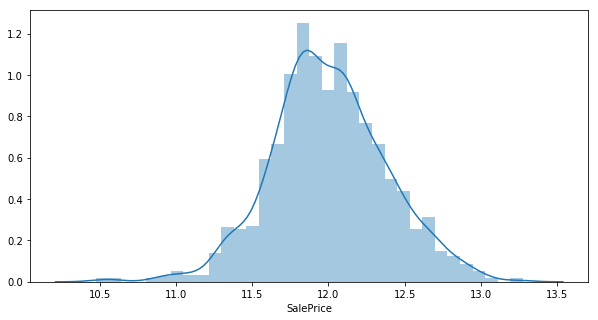

In [73]:
plt.figure(figsize=(10,5))
sns.distplot(house_price.SalePrice)
plt.show()
#Target variable is normally distributed

**Scaling the features**

In [74]:
# scaling the features

from sklearn.preprocessing import scale

# storing column names in cols
# scaling (the dataframe is converted to a numpy array)

cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone',
       'Foundation_Wood', 'GarageType_Attchd', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd',
       'GarageType_No Garage'],
      dtype='object', length=111)

Lets check the distribution again after scaling

In [78]:
# split into train and test

from sklearn.cross_validation import train_test_split

np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=42)

## Step 5: Recursive feature elimination (RFE)

Since there are around 111 features, we will use RFE to get the best 50 features out of the 111 features and use the new
features for further analysis

In [79]:
# Running RFE with the output number of the variable equal to 50

lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(lm, 50)            
rfe = rfe.fit(X_train, y_train)

In [80]:
# Assign the columns selected by RFE to cols

col = X_train.columns[rfe.support_]

# assign the 50 features selected using RFE to a dataframe and view them

temp_df = pd.DataFrame(col)
temp_df

,0
0,MSSubClass
1,LotArea
2,OverallQual
3,OverallCond
4,BsmtFinSF1
5,BsmtUnfSF
6,TotalBsmtSF
7,1stFlrSF
8,2ndFlrSF
9,GrLivArea


In [81]:
# Assign the 50 columns to X_train_rfe
X_train_rfe = X_train[col]

In [82]:
# Associate the new 50 columns to X_train and X_test for further analysis
X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

## Step 6: Model Building and Evaluation

### Ridge Regression

In [83]:
# list pf alphas

params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation

folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    1.5s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [84]:
# display the mean scores

ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=500]
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
22,20,-0.074152,-0.081611,1
21,10,-0.073798,-0.081624,2
20,9,-0.073755,-0.081637,3
19,8,-0.073714,-0.081652,4
18,7,-0.073675,-0.081668,5
17,6,-0.073635,-0.081692,6
16,5,-0.073592,-0.081727,7
23,50,-0.074893,-0.081743,8
15,4,-0.073551,-0.081766,9
14,3,-0.073510,-0.081814,10


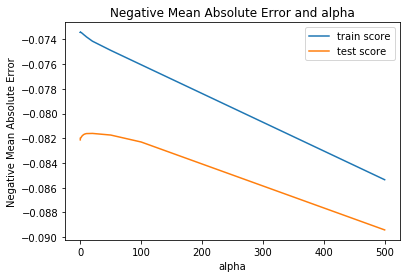

In [85]:
# plotting mean test and train scores with alpha 

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

# plotting

plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [86]:
# get the best estimator for lambda

ridge_model_cv.best_estimator_

Ridge(alpha=20, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [87]:
# check the coefficient values with lambda = 20

alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-0.01174058,  0.02244303,  0.07779612,  0.048404  ,  0.02823384,
       -0.00427053,  0.04867998,  0.03962303,  0.05149061,  0.06826366,
        0.0125114 ,  0.02380264,  0.01247484, -0.0583203 , -0.01084075,
        0.015034  ,  0.01118659,  0.01457351,  0.01757062,  0.00804795,
       -0.01014461,  0.0076498 ,  0.01874129,  0.041462  ,  0.01587844,
        0.0518863 ,  0.03211569,  0.01896615, -0.01161076,  0.02324934,
       -0.01002884,  0.01517982, -0.01922375,  0.02136345,  0.01088516,
        0.00607299,  0.01715706,  0.00869167,  0.00786644,  0.00763397,
        0.02077528,  0.00803854,  0.00494163,  0.02803317,  0.00564126,
        0.0315317 ,  0.00079873,  0.01302583,  0.02388665, -0.00269973])

In [88]:
# Check the mean squared error

mean_squared_error(y_test, ridge.predict(X_test))

0.015582969197103584

In [89]:
# Put the Features and coefficienst in a dataframe

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

,Features,Coefficient
0,MSSubClass,-0.0117
1,LotArea,0.0224
2,OverallQual,0.0778
3,OverallCond,0.0484
4,BsmtFinSF1,0.0282
5,BsmtUnfSF,-0.0043
6,TotalBsmtSF,0.0487
7,1stFlrSF,0.0396
8,2ndFlrSF,0.0515
9,GrLivArea,0.0683


In [90]:
# Assign the Features and their coefficient values to a dictionary which would be used while plotting the bar plot

ridge_coeff_dict = dict(pd.Series(ridge.coef_.round(4), index = X_train.columns))

In [91]:
# Do an RFE to minimise the features to 15
X_train_ridge = X_train[ridge_df.Features]

lm = LinearRegression()
lm.fit(X_train_ridge, y_train)

# running RFE
rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_ridge, y_train)

In [92]:
# Method to get the coefficient values

def find(x):
    return ridge_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp1_df = pd.DataFrame(list(zip( X_train_ridge.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp1_df = temp1_df.loc[temp1_df['rfe_support'] == True]
temp1_df.reset_index(drop=True, inplace=True)

temp1_df['Coefficient'] = temp1_df['Features'].apply(find)
temp1_df = temp1_df.sort_values(by=['Coefficient'], ascending=False)
temp1_df = temp1_df.head(10)
temp1_df

,Features,rfe_support,rfe_ranking,Coefficient
1,OverallQual,True,1,0.0778
7,GrLivArea,True,1,0.0683
12,MSZoning_RL,True,1,0.0519
6,2ndFlrSF,True,1,0.0515
4,TotalBsmtSF,True,1,0.0487
2,OverallCond,True,1,0.0484
11,MSZoning_FV,True,1,0.0415
5,1stFlrSF,True,1,0.0396
13,MSZoning_RM,True,1,0.0321
3,BsmtFinSF1,True,1,0.0282


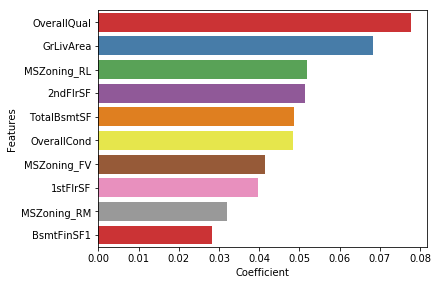

In [93]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp1_df)
plt.show()

The above graph displays the top 10 variables based on the Ridge Regression model that are significant in predicting the price of a house.

### Lasso Regression

In [94]:
lasso = Lasso()

# list of alphas

params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}

# cross validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    2.6s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [95]:
# display the mean scores

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
1,0.0002,-0.073549,-0.082030,1
0,0.0001,-0.073463,-0.082048,2
2,0.0003,-0.073682,-0.082089,3
3,0.0004,-0.073825,-0.082153,4
4,0.0005,-0.073964,-0.082202,5
8,0.004,-0.076626,-0.082256,6
7,0.003,-0.076063,-0.082309,7
5,0.001,-0.074804,-0.082385,8
6,0.002,-0.075661,-0.082439,9
9,0.005,-0.077331,-0.082483,10


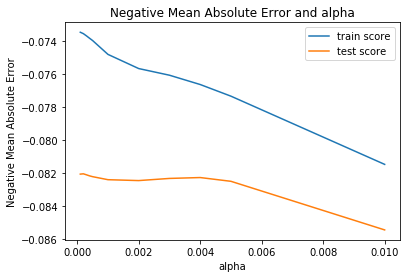

In [96]:
# plotting mean test and train scoes with alpha 

lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

# plotting

plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [97]:
# get the best estimator for lambda

lasso_model_cv.best_estimator_

Lasso(alpha=0.0002, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [98]:
# check the coefficient values with lambda = 0.0002

alpha = 0.0002

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([-0.01034034,  0.02315676,  0.07790456,  0.04910622,  0.02581943,
       -0.00674393,  0.05134156,  0.03500997,  0.04728774,  0.07549929,
        0.01229669,  0.02448565,  0.01225777, -0.06114383, -0.00964381,
        0.01591964,  0.01077407,  0.01281115,  0.01693023,  0.00748192,
       -0.01158891,  0.00579978,  0.01705117,  0.06319006,  0.02738994,
        0.09409876,  0.06951542,  0.01898007, -0.01139527,  0.02382053,
       -0.00999017,  0.01543914, -0.01967156,  0.02152735,  0.01112095,
        0.00579599,  0.01828585,  0.00919524,  0.00773446,  0.00729206,
        0.02120011,  0.00843591,  0.00582179,  0.02836393,  0.00680122,
        0.04721437,  0.00530755,  0.02033711,  0.03921829,  0.00499237])

In [99]:
# Check the mean squared error

mean_squared_error(y_test, lasso.predict(X_test))

0.015438750445540947

In [100]:
# Put the shortlisted Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

,Features,Coefficient
0,MSSubClass,-0.0103
1,LotArea,0.0232
2,OverallQual,0.0779
3,OverallCond,0.0491
4,BsmtFinSF1,0.0258
5,BsmtUnfSF,-0.0067
6,TotalBsmtSF,0.0513
7,1stFlrSF,0.0350
8,2ndFlrSF,0.0473
9,GrLivArea,0.0755


In [101]:
# Put the Features and Coefficients in dictionary

lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))

In [102]:
# Do an RFE to minimise the features to 15

X_train_lasso = X_train[lasso_df.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# running RFE

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_lasso, y_train)

In [103]:
# Method to get the coefficient values

def find(x):
    return lasso_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp2_df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp2_df = temp2_df.loc[temp2_df['rfe_support'] == True]
temp2_df.reset_index(drop=True, inplace=True)

temp2_df['Coefficient'] = temp2_df['Features'].apply(find)
temp2_df = temp2_df.sort_values(by=['Coefficient'], ascending=False)
temp2_df = temp2_df.head(10)
temp2_df

,Features,rfe_support,rfe_ranking,Coefficient
12,MSZoning_RL,True,1,0.094099
1,OverallQual,True,1,0.077905
7,GrLivArea,True,1,0.075499
13,MSZoning_RM,True,1,0.069515
11,MSZoning_FV,True,1,0.063190
4,TotalBsmtSF,True,1,0.051342
2,OverallCond,True,1,0.049106
6,2ndFlrSF,True,1,0.047288
5,1stFlrSF,True,1,0.035010
14,Foundation_PConc,True,1,0.028364


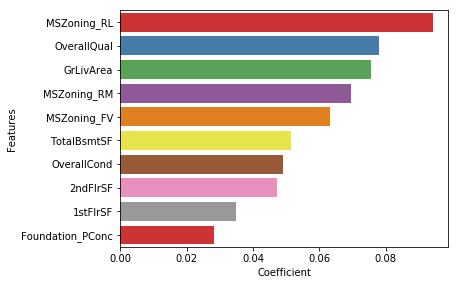

In [105]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp2_df)
plt.show()

The above graph displays the top 10 variables based on the Lasso Regression model that are significant in predicting the price of a house.

### Conclusion :

The optimal lambda value in case of Ridge and Lasso is as below:
- Ridge - 20
- Lasso - 0.0002

The Mean Squared error in case of Ridge and Lasso are:
- Ridge - 0.01558
- Lasso - 0.01543
- The Mean Squared Error of Lasso is slightly lower than that of Ridge

Top 10 features from above models would be:

1. MSZoning_RL
2. OverallQual
3. GrLivArea
4. MSZoning_RM
5. MSZoning_FV
6. TotalBsmtSF
7. OverallCond
8. 2ndFlrSF
9. 1stFlrSF
10. Foundation_PConc
